<a href="https://colab.research.google.com/github/Hendyley/Pole_Dancer/blob/main/SC3000_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1><center>**SC3000 Assignment 1 Balancing a Pole on a Cart**<center></h1>

---

<center><img src="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png" href="https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png"></center>


##### Source: https://miro.medium.com/max/694/1*iOceBp5ks4X_Bs-8vqT2qA.png


### Installing dependencies:

> Indented block



###### Reference:
###### Python Gymnasium source: https://gymnasium.farama.org/


In [1]:
!pip install requests
!pip install --upgrade setuptools
!pip install scores
!pip install gymnasium
!pip install Box2D
!pip install tools

  Using cached Box2D-2.3.2.tar.gz (427 kB)
  Running setup.py clean for Box2D
Failed to build Box2D
    Running setup.py install for Box2D: started
    Running setup.py install for Box2D: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Hendy\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Hendy\\AppData\\Local\\Temp\\pip-install-janhv9bx\\box2d_6ac67776caaf4153bd85b3ee324e6527\\setup.py'"'"'; __file__='"'"'C:\\Users\\Hendy\\AppData\\Local\\Temp\\pip-install-janhv9bx\\box2d_6ac67776caaf4153bd85b3ee324e6527\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Hendy\AppData\Local\Temp\pip-wheel-6enuff60'
       cwd: C:\Users\Hendy\AppData\Local\Temp\pip-install-janhv9bx\box2d_6ac67776caaf4153bd85b3ee324e6527\
  Complete output (16 lines):
  Using setuptools (version 67.5.1).
  running bdist_wheel
  running build
  running build_py
  creating build
  creatin

In [2]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay
!pip install gym pyvirtualdisplay
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

The system cannot find the path specified.


The system cannot find the path specified.


The system cannot find the path specified.
The system cannot find the path specified.


The system cannot find the path specified.


## Importing dependencies and define helper functions

In [51]:
import gym
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
gymlogger.set_level(40) #error only
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

def show_video():
    mp4list = glob.glob('./video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")

## Loading CartPole environment

In [4]:
env = gym.make("CartPole-v1")

We can check the action and observation space of this environment. Discrete(2) means that there are two valid discrete actions: 0 & 1.

In [5]:
print(env.action_space)

Discrete(2)


The observation space is given below. The first two arrays define the min and max values of the 4 observed values, corresponding to cart position, velocity and pole angle, angular velocity.

In [6]:
print(env.observation_space)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


We call each round of the pole-balancing game an "episode". At the start of each episode, make sure the environment is reset, which chooses a random initial state, e.g., pole slightly tilted to the right. This initialization can be achieved by the code below, which returns the observation of the initial state.

In [7]:
observation = env.reset()
print("Initial observations:", observation)


print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Initial observations: (array([-0.02656776,  0.04725083,  0.00725445,  0.02967441], dtype=float32), {})
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


For the CartPole environment, there are two possible actions: 0 for pushing to the left and 1 for pushing to the right. For example, we can push the cart to the left using code below, which returns the new observation, the current reward, an indicator of whether the game ends, and some additional information (not used in this project). For CartPole, the game ends when the pole is significantly tilted or you manage to balance the pole for 500 steps. You get exactly 1 reward for each step before the game ends (i.e., max cumulative reward is 500).

In [8]:
observation, reward, done, truncated, info = env.step(0)
#observation, reward, done, info, terminated, truncated = env.step(0)
print("New observations after choosing action 0:", observation)
print("Reward for this step:", reward)
print("Is this round done?", done or truncated)

New observations after choosing action 0: [-0.02562274 -0.1479744   0.00784794  0.32463732]
Reward for this step: 1.0
Is this round done? False


C:\Users\Hendy\anaconda3\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Now we can play a full round of the game using a naive strategy (always choosing action 0), and show the cumulative reward in the round. Note that reward returned by env.step(*) corresponds to the reward for current step. So we have to accumulate the reward for each step. Clearly, the naive strategy performs poorly by surviving only a dozen of steps.

In [9]:
env = gym.make("CartPole-v1")
observation = env.reset()
cumulative_reward = 0
done = False
while not done:
    observation, reward, done, truncated, info = env.step(0)
    cumulative_reward += reward
print("Cumulative reward for this round:", cumulative_reward)

Cumulative reward for this round: 10.0


## Task 1: Development of an RL agent

An example of a naive agent is given below, which randomly chooses an action regardless of the observation:

In [10]:
def rand_policy_agent(observation):
    return random.randint(0, 1)

## Initialize parameters for Q-learning

In [11]:
print(env.action_space.n)

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

observation = env.reset()
print("Initial observations:", observation)
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))


Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])
epsilon = 1
epsilon_decay_value = 0.99995

q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(int))

2
Initial observations: (array([-0.00182565,  0.0422497 , -0.01613657, -0.0268015 ], dtype=float32), {})
Action Space Discrete(2)
State Space Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)


## Q learning, train the agent on 60000 episodes

In [12]:
import time
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0])
    done = False
    truncated = False
    episode_reward = 0 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done and not truncated: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) 
        else:

            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, truncated, info = env.step(action) 
        episode_reward += reward 
        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: 
            env.render()
           

        if not done and not truncated: 
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total

    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0: 
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

#print(q_table)
env.close()

Episode: 0
Time Average: 5.335807800292969e-07
Mean Reward: 0.016
Time Average: 0.0005976006984710693
Mean Reward: 21.735
Episode: 2000
Time Average: 0.0006156713962554932
Mean Reward: 22.929
Time Average: 0.0005980458259582519
Mean Reward: 22.501
Episode: 4000
Time Average: 0.0005835115909576416
Mean Reward: 21.889
Time Average: 0.0006022965908050537
Mean Reward: 22.032
Episode: 6000
Time Average: 0.0006112351417541504
Mean Reward: 22.769
Time Average: 0.0006310141086578369
Mean Reward: 22.913
Episode: 8000
Time Average: 0.000644711971282959
Mean Reward: 21.62
Time Average: 0.0005975985527038575
Mean Reward: 22.1
Episode: 10000
Time Average: 0.0005887711048126221
Mean Reward: 22.341
Epsilon: 0.9512282354250458
Time Average: 0.0005645642280578614
Mean Reward: 22.666
Episode: 12000
Time Average: 0.0006312382221221924
Mean Reward: 23.575
Epsilon: 0.8824941446941661
Epsilon: 0.8607047486686201
Time Average: 0.0006960587501525879
Mean Reward: 25.779
Epsilon: 0.8394533480303666
Episode: 140

# Reinforcment Learning agent based on the Q-values we obtained

In [13]:
def Reinforcement_Learning_agent(state):
    discrete_state=get_discrete_state(state)
    action = np.argmax(q_table[discrete_state]) 
    return action

For Task 1, we can show the observation and chosen action below:

In [14]:
observation = env.reset()
action = Reinforcement_Learning_agent(observation[0]) #need to include [0] bcuz jupyter weird, colab noneed
print("Observation:", observation[0])
print("Chosen action:", action)

Observation: [ 0.04352939 -0.02902237  0.02726347 -0.03537653]
Chosen action: 1


## Task 2: Demonstrate the effectiveness of the RL agent

For this task, use the agent developed in Task 1 to play the game for 100 episodes (refer to tutorial for how to play a round), record the cumulative reward for each round, and plot the reward for each round. A sample plotting code is given below. Note that you must include code to play for 100 episodes and use the code to obtain round_results for plotting. DO NOT record the round results in advance and paste the results to the notebook.

In [15]:
env = gym.make("CartPole-v1")
test_episodes=100
episode_results = []

for test_episode in range(test_episodes):
    initial_state=env.reset()
    state=initial_state[0]
    cumulative_reward = 0
    done=False
    truncated=False
    while not done and not truncated:
        action = Reinforcement_Learning_agent(state)
        state, reward, done, truncated, info = env.step(action)
        cumulative_reward += reward
    episode_results.append(cumulative_reward)
  #print("Cumulative reward for this round:", cumulative_reward)

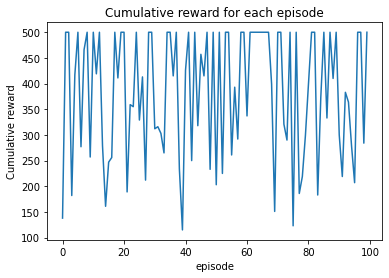

In [16]:
plt.plot(episode_results)
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [17]:
episode_results

[138.0,
 500.0,
 500.0,
 182.0,
 417.0,
 500.0,
 277.0,
 466.0,
 500.0,
 257.0,
 500.0,
 419.0,
 500.0,
 279.0,
 161.0,
 247.0,
 256.0,
 500.0,
 411.0,
 500.0,
 500.0,
 189.0,
 359.0,
 355.0,
 500.0,
 329.0,
 413.0,
 212.0,
 500.0,
 500.0,
 312.0,
 316.0,
 303.0,
 265.0,
 500.0,
 500.0,
 415.0,
 500.0,
 234.0,
 115.0,
 426.0,
 500.0,
 250.0,
 500.0,
 318.0,
 457.0,
 415.0,
 500.0,
 233.0,
 500.0,
 203.0,
 500.0,
 225.0,
 500.0,
 500.0,
 261.0,
 393.0,
 292.0,
 500.0,
 500.0,
 337.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 399.0,
 151.0,
 500.0,
 500.0,
 321.0,
 290.0,
 500.0,
 123.0,
 500.0,
 186.0,
 219.0,
 299.0,
 400.0,
 500.0,
 500.0,
 183.0,
 373.0,
 500.0,
 333.0,
 500.0,
 410.0,
 500.0,
 300.0,
 219.0,
 383.0,
 364.0,
 279.0,
 207.0,
 500.0,
 500.0,
 284.0,
 500.0]

Print the average reward over the 100 episodes.

In [18]:
print("Average reward: ", sum(episode_results) / len(episode_results))
print("Is my agent good enough?", sum(episode_results) / len(episode_results) > 195)

Average reward:  383.6
Is my agent good enough? True


## Task 3: Render one episode played by the agent

Plug your agent to the code below to obtain rendered result.

In [19]:
!pip install moviepy

In [64]:
env = RecordVideo(gym.make("CartPole-v1"), "./video")
initial_observation = env.reset()
observation=initial_observation[0]
while True:
    env.render()
    #your agent goes here
    action = Reinforcement_Learning_agent(observation)
    observation, reward, done, truncated, info = env.step(action)
    #print(observation)
    if done: 
        break;    
env.close()
show_video()

Could not find video


## Task 4: Format the Jupyter notebook by including step-by-step instruction and explanation

In [47]:
!pip install gym
!python -m pip install pyvirtualdisplay
!pip3 install box2d

  Using cached Box2D-2.3.2.tar.gz (427 kB)
  Running setup.py clean for box2d
Failed to build box2d
    Running setup.py install for box2d: started
    Running setup.py install for box2d: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Hendy\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Hendy\\AppData\\Local\\Temp\\pip-install-sv6bs4fi\\box2d_552742f4e1b443728f138cb5b1cf6401\\setup.py'"'"'; __file__='"'"'C:\\Users\\Hendy\\AppData\\Local\\Temp\\pip-install-sv6bs4fi\\box2d_552742f4e1b443728f138cb5b1cf6401\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Hendy\AppData\Local\Temp\pip-wheel-ndnm8uz5'
       cwd: C:\Users\Hendy\AppData\Local\Temp\pip-install-sv6bs4fi\box2d_552742f4e1b443728f138cb5b1cf6401\
  Complete output (16 lines):
  Using setuptools (version 67.5.1).
  running bdist_wheel
  running build
  running build_py
  creating build
  creatin

In [62]:
import gym
from gym import wrappers
from gym.wrappers.monitoring.video_recorder import VideoRecorder

env = gym.make("CartPole-v1")
env = VideoRecorder(env, "./video")


observation = env
while True:
    #your agent goes here
    action = Reinforcement_Learning_agent(observation)
    observation, reward, done, truncated, info = env.step(action)
    #print(observation)
    if done: 
        break;    
env.close()
show_video()

TypeError: unsupported operand type(s) for /: 'VideoRecorder' and 'float'